In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import column

# https://www.kaggle.com/datasets/anthonytherrien/depression-dataset

#About Dataset
#Dataset Overview (Synthetic)

#This dataset contains information on individuals with various attributes related to their personal and lifestyle factors. It is designed to facilitate analysis in areas such as health, lifestyle, and socio-economic status.

#Features

#Name: The full name of the individual.
#Age: The age of the individual in years.
#Marital Status: The marital status of the individual. Possible values include Single, Married, Divorced, and Widowed.
#Education Level: The highest level of education attained by the individual. Possible values include High School,
#Associate Degree, Bachelor's Degree, Master's Degree, and PhD.
#Number of Children: The number of children the individual has.
#Smoking Status: Indicates whether the individual is a smoker or not. Possible values are Smoker, Former and Non-smoker.
#Physical Activity Level: The level of physical activity undertaken by the individual. Possible values include Sedentary, Moderate, and Active.
#Employment Status: The employment status of the individual. Possible values include Employed and Unemployed.
#Income: The annual income of the individual in USD.
#Alcohol Consumption: The level of alcohol consumption. Possible values include Low, Moderate, and High.
#Dietary Habits: The dietary habits of the individual. Possible values include Healthy, Moderate, and Unhealthy.
#Sleep Patterns: The quality of sleep. Possible values include Good, Fair, and Poor.
#History of Mental Illness: Whether the individual has a history of mental illness. Possible values are Yes and No.
#History of Substance Abuse: Whether the individual has a history of substance abuse. Possible values are Yes and No.
#Family History of Depression: Indicates if there is a family history of depression. Possible values are Yes and No.
#Chronic Medical Conditions: Whether the individual has chronic medical conditions. Possible values are Yes and No.
#Usage

#This dataset is intended for use in analyzing various health, lifestyle, and socio-economic factors. It is suitable for tasks such as predictive modeling, clustering, and exploratory data analysis.

df = pd.read_csv("data/depression_data.csv")
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [82]:
df.columns = df.columns.str.replace(" ", "_")

In [83]:
df.drop("Name",axis=1,inplace=True)

In [87]:
#Yes(1) / No(0) -> Chronic_Medical_Conditions, Family_History_of_Depression, History_of_Substance_Abuse, History_of_Mental_Illness
yes_no_columns = ['Chronic_Medical_Conditions', 'Family_History_of_Depression', 'History_of_Substance_Abuse', 'History_of_Mental_Illness']
for column in yes_no_columns:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital_Status                413768 non-null  object 
 2   Education_Level               413768 non-null  object 
 3   Number_of_Children            413768 non-null  int64  
 4   Smoking_Status                413768 non-null  object 
 5   Physical_Activity_Level       413768 non-null  object 
 6   Employment_Status             413768 non-null  object 
 7   Income                        413768 non-null  float64
 8   Alcohol_Consumption           413768 non-null  object 
 9   Dietary_Habits                413768 non-null  object 
 10  Sleep_Patterns                413768 non-null  object 
 11  History_of_Mental_Illness     413768 non-null  int64  
 12  History_of_Substance_Abuse    413768 non-nul

In [100]:
object_columns = df.select_dtypes(include='object').columns.tolist()
for column in object_columns:
    print(df[column].value_counts())

Marital_Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64
Education_Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64
Smoking_Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64
Physical_Activity_Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64
Employment_Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64
Alcohol_Consumption
Moderate    173440
Low         139250
High        101078
Name: count, dtype: int64
Dietary_Habits
Unhealthy    170817
Moderate     170446
Healthy       72505
Name: count, dtype: int64
Sleep_Patterns
Fair    196789
Poor    129582
Good     87397
Name: count, dtype: int64


In [101]:
# Ordinal encoding haritaları

marital_status_map = {
    'Single': 0,
    'Divorced': 1,
    'Widowed': 2,
    'Married': 3
}

education_map = {
    'High School': 0,
    'Associate Degree': 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    'PhD': 4
}

smoking_map = {
    'Non-smoker': 0,
    'Former': 1,
    'Current': 2
}

activity_map = {
    'Sedentary': 0,
    'Moderate': 1,
    'Active': 2
}

employment_map = {
    'Unemployed': 0,
    'Employed': 1
}

alcohol_map = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}

diet_map = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2
}

sleep_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2
}

# Encoding uygulamaları
df['Marital_Status'] = df['Marital_Status'].map(marital_status_map)
df['Education_Level'] = df['Education_Level'].map(education_map)
df['Smoking_Status'] = df['Smoking_Status'].map(smoking_map)
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map(activity_map)
df['Employment_Status'] = df['Employment_Status'].map(employment_map)
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].map(alcohol_map)
df['Dietary_Habits'] = df['Dietary_Habits'].map(diet_map)
df['Sleep_Patterns'] = df['Sleep_Patterns'].map(sleep_map)


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital_Status                413768 non-null  int64  
 2   Education_Level               413768 non-null  int64  
 3   Number_of_Children            413768 non-null  int64  
 4   Smoking_Status                413768 non-null  int64  
 5   Physical_Activity_Level       413768 non-null  int64  
 6   Employment_Status             413768 non-null  int64  
 7   Income                        413768 non-null  float64
 8   Alcohol_Consumption           413768 non-null  int64  
 9   Dietary_Habits                413768 non-null  int64  
 10  Sleep_Patterns                413768 non-null  int64  
 11  History_of_Mental_Illness     413768 non-null  int64  
 12  History_of_Substance_Abuse    413768 non-nul

In [104]:
#df.to_excel("data/clean_depression_data.xlsx", index=False)

<Axes: xlabel='Marital_Status', ylabel='Sleep_Patterns'>

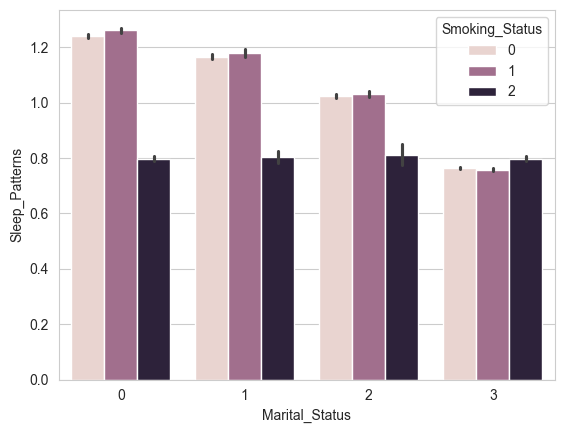

In [107]:
sns.barplot(df, x='Marital_Status', y='Sleep_Patterns',hue='Smoking_Status')

<Axes: xlabel='Smoking_Status', ylabel='Education_Level'>

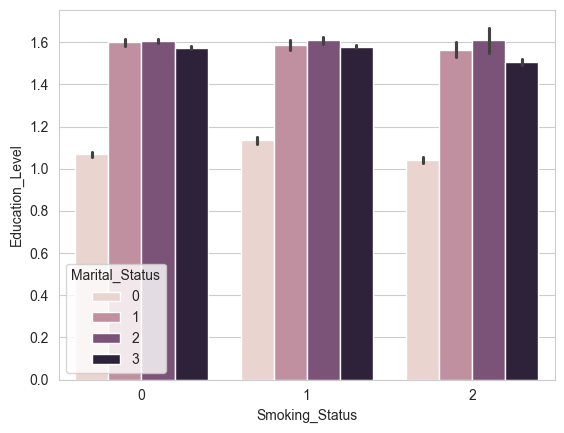

In [113]:
sns.barplot(df, x='Smoking_Status', y='Education_Level',hue='Marital_Status')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital_Status                413768 non-null  int64  
 2   Education_Level               413768 non-null  int64  
 3   Number_of_Children            413768 non-null  int64  
 4   Smoking_Status                413768 non-null  int64  
 5   Physical_Activity_Level       413768 non-null  int64  
 6   Employment_Status             413768 non-null  int64  
 7   Income                        413768 non-null  float64
 8   Alcohol_Consumption           413768 non-null  int64  
 9   Dietary_Habits                413768 non-null  int64  
 10  Sleep_Patterns                413768 non-null  int64  
 11  History_of_Mental_Illness     413768 non-null  int64  
 12  History_of_Substance_Abuse    413768 non-nul

In [116]:
X = df.drop("Family_History_of_Depression", axis=1)
y = df["Family_History_of_Depression"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [133]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [130]:
r2_scores = dict()
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)
    r2_scores[list(models.keys())[i]] = model_train_r2
    print("-----------------------------------")

    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")



Random Forest Regressor
Model performance for Training Set
Root Mean Squared Error:  0.16320234657660412
Mean Absolute Error:  0.1388289272434116
R2 Score:  0.8646503611190975
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  0.44133844573963654
Mean Absolute Error:  0.376881439769276
R2 Score:  0.006756228577562418
-----------------------------------




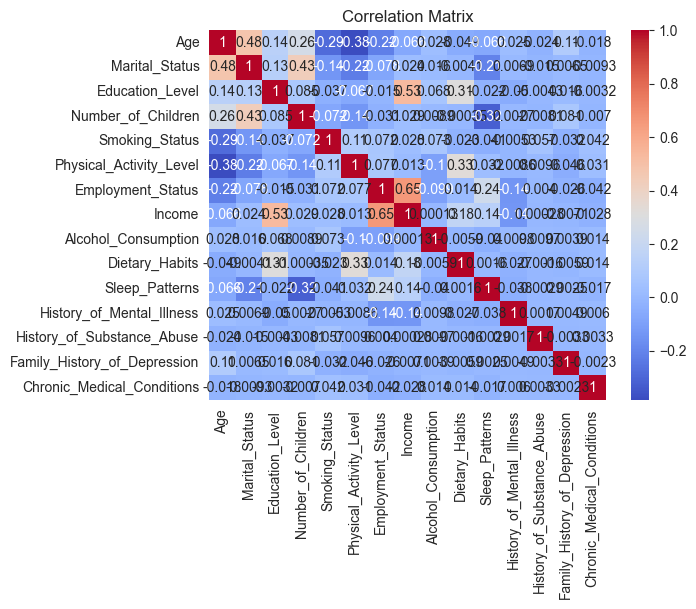

In [131]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [132]:
r2_scores

{'Random Forest Regressor': 0.8646503611190975}

In [129]:
models = {
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=500,
                                                     min_samples_split=2,
                                                      max_features=7,
                                                      max_depth = None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")

    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

RandomForestRegressor(max_features=7, n_estimators=500)
Evaluation for Training Set
RMSE : 0.16329153756633333
Mean Absolute Error : 0.13890971802635713
R2 Score : 0.8645023820341953
-----------------------------
Evaluation for Test Set
RMSE : 0.44149249861152556
Mean Absolute Error : 0.3770869645777445
R2 Score : 0.006062707484990493
-----------------------------


